In [1]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from scipy.signal import find_peaks
from utils import AnteriorPosterior, AnteriorPosteriorTime, tripleplot
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
try:
    from pathlib import Path
    Path().expanduser()
except (ImportError, AttributeError):
        from pathlib2 import Path

try:
        import tempfile
        tempfile.TemporaryDirectory
except (ImportError, AttributeError):
       from backports import tempfile

In [2]:
Kymo = '/home/kapoorlab/Downloads/Darine/Dpachys_10/DistanceMethodCurvature_Dpachys_controlTrackID1.tif'
Embryo = '/home/kapoorlab/Downloads/Darine/Dpachys_10/Dpachys_control.tif'
Csv = '/home/kapoorlab/Downloads/Darine/Dpachys_10/Co-ordinatesETrack_Dpachys_controlCellID01.txt'
savedir = '/home/kapoorlab/Downloads/Darine/Dpachys_10/Results/'
Time_unit = 10
Xcalibration = 0.034
Kymoimage = imread(Kymo)
Embryoimage = imread(Embryo)
# Skip the display points on the clock
displayskip = 2
blocksize = 50
cutEnd = 300
Kymoimage = Kymoimage[:Kymoimage.shape[0]-cutEnd,:]
Path(savedir).mkdir(exist_ok = True)

AnteriorStart = 0
AnteriorEnd = Kymoimage.shape[0]//2
PosteriorStart = AnteriorEnd
PosteriorEnd = Kymoimage.shape[0] 

In [3]:

x, y, t, distance, perimeter, N, M = np.loadtxt(Csv, skiprows = 3, unpack=True)
Blockiter = int(len(x)/max(t))
print('Total Perimeter points on Kymo:', Blockiter)
Dictionary = []
for i in range(0, Blockiter):
    Dictionary.append([i, x[i], y[i]])


Total Perimeter points on Kymo: 2401


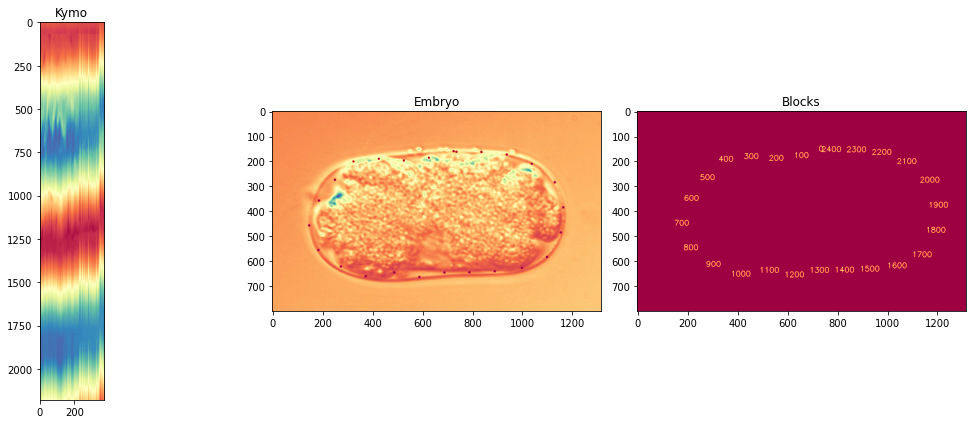

In [4]:
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
# org 
org = (50, 50) 
# fontScale 
fontScale = 1
 
color = (255, 255, 0) 
thickness = 1
Clock = np.zeros([Embryoimage.shape[1], Embryoimage.shape[2]])
for i in range(0, Blockiter, 2 *blocksize):
    cv2.circle(Embryoimage[0,:], (int(x[i]), int(y[i])), 5,(255,0,0), thickness = -1 )
    cv2.putText(Clock, str(i), (int(x[i]), int(y[i])), font,  
                   fontScale, color, thickness, cv2.LINE_AA)
tripleplot(Kymoimage,Embryoimage[0,:], Clock, 'Kymo', 'Embryo', 'Blocks')

0.16204829039053636 Anterior
0.10803219359369091 Anterior
0.1890563387889591 Anterior
0.13504024199211365 Anterior
0.10803219359369091 Anterior
0.1890563387889591 Anterior
0.1890563387889591 Anterior
0.1890563387889591 Anterior
0.1890563387889591 Anterior
0.1890563387889591 Anterior
0.1890563387889591 Anterior
0.13504024199211365 Anterior
0.13504024199211365 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 Anterior
0.10803219359369091 A

(-0.001, 0.01)

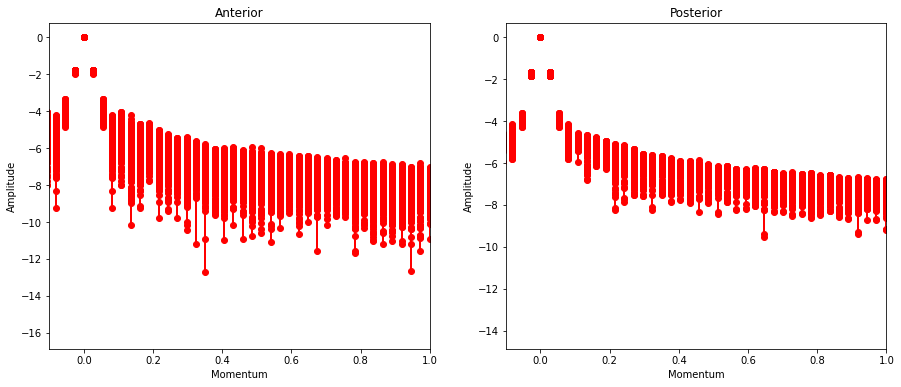

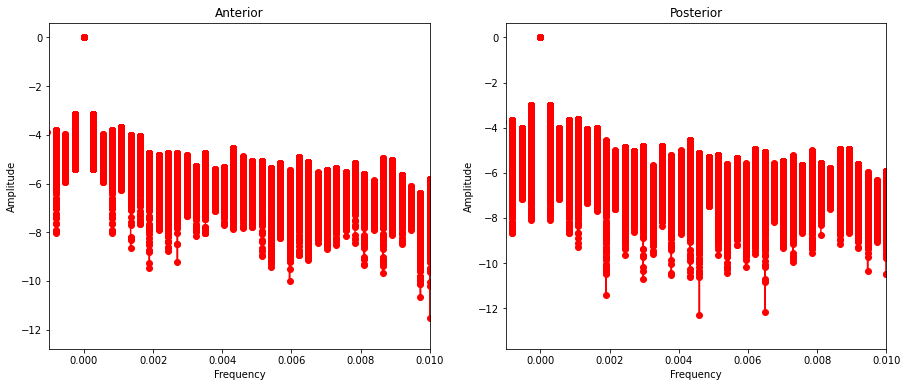

In [5]:
Name = os.path.basename(os.path.splitext(Kymo)[0])
FrequA, FrequP, AnteriorVelocity, PosteriorVelocity = AnteriorPosterior(Kymoimage, AnteriorStart, AnteriorEnd, PosteriorStart, PosteriorEnd, Xcalibration)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].plot( FrequA, np.log(AnteriorVelocity), '-ro')
ax[0].set_xlabel('Momentum')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Anterior')
ax[0].set_xlim([-0.1,1])

ax[1].plot( FrequP, np.log(PosteriorVelocity), '-ro')
ax[1].set_xlabel('Momentum')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Posterior')
ax[1].set_xlim([-0.1,1])
FrequAT, FrequPT, AnteriorT, PosteriorT = AnteriorPosteriorTime(Kymoimage, AnteriorStart, AnteriorEnd, PosteriorStart, PosteriorEnd, Time_unit)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].plot( FrequAT, np.log(AnteriorT), '-ro')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Anterior')
ax[0].set_xlim([-0.001,0.01])

ax[1].plot( FrequPT, np.log(PosteriorT), '-ro')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Posterior')
ax[1].set_xlim([-0.001,0.01])
